In [1]:
import gpt as g
import matplotlib.pyplot as plt
import numpy as np

## Lecture 3: A first look at the QCD module.  We generate a quenched ensemble, measure the wilson flow scale and compute a domain-wall pion correlator.

We start by creating a $8^3 \times 32$ double precision grid.

In [2]:
grid = g.grid([8, 8, 8, 32], g.double)

Next, we create a parallel pseudorandom number generator and a unit gauge configuration.

In [3]:
rng = g.random("test")
U = g.qcd.gauge.unit(grid)

GPT :       0.695516 s : Initializing gpt.random(test,vectorized_ranlux24_389_64) took 0.000295162 s


The gauge field is a list of color matrices, currently initialized to unit matrices.

In [4]:
Nd = len(U)
g.message(f"We live in {Nd} space-time dimensions")
g.message(f"U[0][0,0,0,0] = {U[0][0,0,0,0]}")

GPT :       0.739074 s : We live in 4 space-time dimensions
GPT :       0.743269 s : U[0][0,0,0,0] = tensor([[1.+0.j 0.+0.j 0.+0.j]
                       :  [0.+0.j 1.+0.j 0.+0.j]
                       :  [0.+0.j 0.+0.j 1.+0.j]],ot_matrix_su_n_fundamental_group(3))


Next, we will prepare for applying a SU$(2)$ subgroup heatbath algorithm to generate an ensemble of quenched QCD configurations.  A reasonable updating scheme, first updates the even and then the odd sites.  So we need helper fields to mask these subsets.

In [5]:
grid_eo = grid.checkerboarded(g.redblack)
mask_rb = g.complex(grid_eo)
mask_rb[:] = 1
mask = g.complex(grid)

Let us now generate a pure Wilson gauge ensemble with $\beta=5.5$.  For this, we first define a staple and the parameter.

In [6]:
# gauge action parameter
beta = 5.5

# simple plaquette action
def staple(U, mu):
    st = g.lattice(U[0])
    st[:] = 0
    Nd = len(U)
    for nu in range(Nd):
        if mu != nu:
            st += beta * g.qcd.gauge.staple(U, mu, nu) / U[0].otype.Nc
    return st

In [7]:
g.default.push_verbose("su2_heat_bath", False) # disable verbose algorithm

markov = g.algorithms.markov.su2_heat_bath(rng)

for it in range(100):
    plaq = g.qcd.gauge.plaquette(U)
    R_2x1 = g.qcd.gauge.rectangle(U, 2, 1)
    g.message(f"SU(2)-subgroup heatbath {it} has P = {plaq}, R_2x1 = {R_2x1}")
    for cb in [g.even, g.odd]:
        mask[:] = 0
        mask_rb.checkerboard(cb)
        g.set_checkerboard(mask, mask_rb)

        for mu in range(Nd):
            st = g.eval(staple(U, mu))
            markov(U[mu], st, mask)

GPT :       1.228672 s : SU(2)-subgroup heatbath 0 has P = 1.0, R_2x1 = 1.0
GPT :       2.024035 s : SU(2)-subgroup heatbath 1 has P = 0.6690106656133712, R_2x1 = 0.49840042565202697
GPT :       3.018548 s : SU(2)-subgroup heatbath 2 has P = 0.597529950168559, R_2x1 = 0.3989602320643259
GPT :       3.768288 s : SU(2)-subgroup heatbath 3 has P = 0.574074009187597, R_2x1 = 0.3651939333922672
GPT :       4.527717 s : SU(2)-subgroup heatbath 4 has P = 0.560211411679096, R_2x1 = 0.3453226269277517
GPT :       5.288741 s : SU(2)-subgroup heatbath 5 has P = 0.5512347885669554, R_2x1 = 0.3330227490132814
GPT :       6.078276 s : SU(2)-subgroup heatbath 6 has P = 0.5448459886651085, R_2x1 = 0.324675311762747
GPT :       6.851558 s : SU(2)-subgroup heatbath 7 has P = 0.5414547577156111, R_2x1 = 0.32047505366100904
GPT :       7.593363 s : SU(2)-subgroup heatbath 8 has P = 0.5389550422162213, R_2x1 = 0.3170285207906144
GPT :       8.623147 s : SU(2)-subgroup heatbath 9 has P = 0.5374028782315653,

GPT :      63.711681 s : SU(2)-subgroup heatbath 77 has P = 0.4988943200994418, R_2x1 = 0.26234017632122436
GPT :      64.460567 s : SU(2)-subgroup heatbath 78 has P = 0.4990565364723418, R_2x1 = 0.26275856334032516
GPT :      65.205037 s : SU(2)-subgroup heatbath 79 has P = 0.5001406479881055, R_2x1 = 0.26397745448997223
GPT :      65.943483 s : SU(2)-subgroup heatbath 80 has P = 0.4996786317077962, R_2x1 = 0.26318061582624286
GPT :      66.685377 s : SU(2)-subgroup heatbath 81 has P = 0.4987926866663753, R_2x1 = 0.2624054602526124
GPT :      67.428747 s : SU(2)-subgroup heatbath 82 has P = 0.4982065830637969, R_2x1 = 0.2607413427661306
GPT :      68.168230 s : SU(2)-subgroup heatbath 83 has P = 0.49759479874287593, R_2x1 = 0.26046806133127076
GPT :      68.905076 s : SU(2)-subgroup heatbath 84 has P = 0.49587414167832694, R_2x1 = 0.25895552394334154
GPT :      69.649296 s : SU(2)-subgroup heatbath 85 has P = 0.4979953837991206, R_2x1 = 0.2620148450232836
GPT :      70.393859 s : SU(2

We can now save the current gauge configuration to a file.

In [8]:
g.save("/notebooks/ckpoint.lat", U, g.format.nersc())

Grid : Message : 80.790184 s : IOobject: C++ write I/O /notebooks/ckpoint.lat : 9437184 bytes and offset 571
Grid : Message : 80.821321 s : IOobject:  write 9437184 bytes in 0.031154 s 288.887 MB/s 
Grid : Message : 80.821343 s : IOobject: endian and checksum overhead 0.001471 s
Grid : Message : 80.821352 s : writeLatticeObject: unvectorize overhead 0.001286 s
Grid : Message : 80.833499 s : Written NERSC Configuration on /notebooks/ckpoint.lat checksum d1f8047c plaq 0.49813


For completeness, here is how we would load a gauge configuration:

In [9]:
Uprime = g.load("/notebooks/ckpoint.lat")

Grid : Message : 80.846075 s : GPT::IO: gdimension[0] = 8
Grid : Message : 80.846091 s : GPT::IO: gdimension[1] = 8
Grid : Message : 80.846098 s : GPT::IO: gdimension[2] = 8
Grid : Message : 80.846106 s : GPT::IO: gdimension[3] = 32
Grid : Message : 80.846856 s : * BEGIN_HEADER
Grid : Message : 80.846902 s : * HDR_VERSION = 
Grid : Message : 80.846910 s : * DATATYPE = 4D_SU3_GAUGE_3x3
Grid : Message : 80.846920 s : * STORAGE_FORMAT = 
Grid : Message : 80.846926 s : * DIMENSION_1 = 8
Grid : Message : 80.846935 s : * DIMENSION_2 = 8
Grid : Message : 80.846945 s : * DIMENSION_3 = 8
Grid : Message : 80.846952 s : * DIMENSION_4 = 32
Grid : Message : 80.846963 s : * LINK_TRACE = -0.00047949944
Grid : Message : 80.846971 s : * PLAQUETTE  = 0.4981299962
Grid : Message : 80.846982 s : * BOUNDARY_1 = PERIODIC
Grid : Message : 80.846996 s : * BOUNDARY_2 = PERIODIC
Grid : Message : 80.847000 s : * BOUNDARY_3 = PERIODIC
Grid : Message : 80.847005 s : * BOUNDARY_4 = PERIODIC
Grid : Message : 80.8470

Next, let us smear the gauge field using the Wilson flow and a fourth-order Runge-Kutta scheme:

In [10]:
t = 0.0
eps = 0.05
U_wf = g.copy(U)
plot_x = []
plot_y = []
for i in range(15):
    U_wf = g.qcd.gauge.smear.wilson_flow(U_wf, epsilon=eps)
    t += eps
    E = g.qcd.gauge.energy_density(U_wf)
    g.message(f"t^2 E(t={t:g})={t**2. * E}")
    plot_x.append(t)
    plot_y.append(t**2. * E)

GPT :      81.320474 s : t^2 E(t=0.05)=0.005810520748364589
GPT :      81.592873 s : t^2 E(t=0.1)=0.02174229379848457
GPT :      81.866448 s : t^2 E(t=0.15)=0.04493423745983812
GPT :      82.126579 s : t^2 E(t=0.2)=0.07285409659909867
GPT :      82.387142 s : t^2 E(t=0.25)=0.10378780682326139
GPT :      82.645226 s : t^2 E(t=0.3)=0.1367131480345164
GPT :      82.897213 s : t^2 E(t=0.35)=0.17105448048020502
GPT :      83.157549 s : t^2 E(t=0.4)=0.20649231431253923
GPT :      83.408843 s : t^2 E(t=0.45)=0.24284421848087684
GPT :      83.664786 s : t^2 E(t=0.5)=0.2799961091006515
GPT :      83.916811 s : t^2 E(t=0.55)=0.3178636509857205
GPT :      84.183352 s : t^2 E(t=0.6)=0.35637195185484694
GPT :      84.434624 s : t^2 E(t=0.65)=0.3954467115073493
GPT :      84.672887 s : t^2 E(t=0.7)=0.43501155876736153
GPT :      84.928478 s : t^2 E(t=0.75)=0.47498750077044555


We can use this to approximately set a scale for this ensemble:

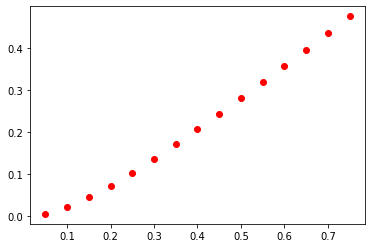

GPT :      85.028145 s : Lattice scale is approximately: 0.94 GeV


In [11]:
plt.plot(plot_x, plot_y, 'ro')
plt.show()

t0_over_asqr = 0.525
ainvOverGeV = 1.3 * t0_over_asqr**0.5  # live in world with t0^-1/2 = 1.3 GeV
g.message(f"Lattice scale is approximately: {ainvOverGeV:.2g} GeV")

Now, let us prepare a mobius domain-wall fermion on this gauge configuration.

In [12]:
qm = g.qcd.fermion.mobius(U, {
    "mass": 0.12,
    "M5": 1.8,
    "b": 1.5,
    "c": 0.5,
    "Ls": 12,
    "boundary_phases": [1.0, 1.0, 1.0, -1.0],
})

Create a physical four-dimensional propagator using a simple even-odd preconditioned solver.

In [13]:
pc = g.qcd.fermion.preconditioner
inv = g.algorithms.inverter

g.default.push_verbose("cg_convergence", True) # want to see CG progress
Q = qm.propagator(inv.preconditioned(pc.eo2_ne(), inv.cg({"eps": 1e-6, "maxiter": 100}))).grouped(1)

Finally, let us create a point source at the origin and create a propagator field.

In [14]:
src = g.mspincolor(grid)
g.create.point(src, [0, 1, 0, 0])

prop_field = g.eval( Q * src )

GPT :      85.582798 s : cg: iteration 0: 1.584105e-01 / 1.004914e-12
GPT :      85.636232 s : cg: iteration 1: 5.392260e-02 / 1.004914e-12
GPT :      85.701626 s : cg: iteration 2: 2.842069e-02 / 1.004914e-12
GPT :      85.759671 s : cg: iteration 3: 1.582130e-02 / 1.004914e-12
GPT :      85.820299 s : cg: iteration 4: 9.292336e-03 / 1.004914e-12
GPT :      85.881978 s : cg: iteration 5: 6.019122e-03 / 1.004914e-12
GPT :      85.945778 s : cg: iteration 6: 4.171264e-03 / 1.004914e-12
GPT :      86.018681 s : cg: iteration 7: 3.077872e-03 / 1.004914e-12
GPT :      86.115801 s : cg: iteration 8: 2.304801e-03 / 1.004914e-12
GPT :      86.204624 s : cg: iteration 9: 1.800294e-03 / 1.004914e-12
GPT :      86.297794 s : cg: iteration 10: 1.440302e-03 / 1.004914e-12
GPT :      86.385984 s : cg: iteration 11: 1.156532e-03 / 1.004914e-12
GPT :      86.469620 s : cg: iteration 12: 9.395925e-04 / 1.004914e-12
GPT :      86.554053 s : cg: iteration 13: 7.911396e-04 / 1.004914e-12
GPT :      86.63

GPT :      94.172256 s : cg: iteration 15: 3.706595e-04 / 1.004157e-12
GPT :      94.240563 s : cg: iteration 16: 3.139982e-04 / 1.004157e-12
GPT :      94.308058 s : cg: iteration 17: 2.688514e-04 / 1.004157e-12
GPT :      94.365762 s : cg: iteration 18: 2.311216e-04 / 1.004157e-12
GPT :      94.428106 s : cg: iteration 19: 2.039108e-04 / 1.004157e-12
GPT :      94.484986 s : cg: iteration 20: 1.783714e-04 / 1.004157e-12
GPT :      94.540847 s : cg: iteration 21: 1.566457e-04 / 1.004157e-12
GPT :      94.598434 s : cg: iteration 22: 1.375597e-04 / 1.004157e-12
GPT :      94.658282 s : cg: iteration 23: 1.228833e-04 / 1.004157e-12
GPT :      94.720615 s : cg: iteration 24: 1.087892e-04 / 1.004157e-12
GPT :      94.780450 s : cg: iteration 25: 9.817327e-05 / 1.004157e-12
GPT :      94.840729 s : cg: iteration 26: 8.808683e-05 / 1.004157e-12
GPT :      94.898908 s : cg: iteration 27: 7.999800e-05 / 1.004157e-12
GPT :      94.958308 s : cg: iteration 28: 7.229359e-05 / 1.004157e-12
GPT : 

GPT :     101.193706 s : cg: iteration 30: 7.590299e-05 / 1.018158e-12
GPT :     101.250770 s : cg: iteration 31: 7.216383e-05 / 1.018158e-12
GPT :     101.307625 s : cg: iteration 32: 6.916704e-05 / 1.018158e-12
GPT :     101.364741 s : cg: iteration 33: 6.522641e-05 / 1.018158e-12
GPT :     101.421656 s : cg: iteration 34: 6.185484e-05 / 1.018158e-12
GPT :     101.477758 s : cg: iteration 35: 5.809258e-05 / 1.018158e-12
GPT :     101.534837 s : cg: iteration 36: 5.418451e-05 / 1.018158e-12
GPT :     101.592186 s : cg: iteration 37: 4.979649e-05 / 1.018158e-12
GPT :     101.651242 s : cg: iteration 38: 4.556463e-05 / 1.018158e-12
GPT :     101.707329 s : cg: iteration 39: 4.138659e-05 / 1.018158e-12
GPT :     101.764783 s : cg: iteration 40: 3.803671e-05 / 1.018158e-12
GPT :     101.821387 s : cg: iteration 41: 3.518618e-05 / 1.018158e-12
GPT :     101.878319 s : cg: iteration 42: 3.294955e-05 / 1.018158e-12
GPT :     101.935628 s : cg: iteration 43: 3.107399e-05 / 1.018158e-12
GPT : 

GPT :     107.914773 s : cg: iteration 45: 2.644250e-05 / 1.030668e-12
GPT :     107.971184 s : cg: iteration 46: 2.434427e-05 / 1.030668e-12
GPT :     108.027625 s : cg: iteration 47: 2.216755e-05 / 1.030668e-12
GPT :     108.084358 s : cg: iteration 48: 2.024387e-05 / 1.030668e-12
GPT :     108.143295 s : cg: iteration 49: 1.835665e-05 / 1.030668e-12
GPT :     108.200548 s : cg: iteration 50: 1.675536e-05 / 1.030668e-12
GPT :     108.256922 s : cg: iteration 51: 1.527384e-05 / 1.030668e-12
GPT :     108.313796 s : cg: iteration 52: 1.388965e-05 / 1.030668e-12
GPT :     108.373398 s : cg: iteration 53: 1.266596e-05 / 1.030668e-12
GPT :     108.430446 s : cg: iteration 54: 1.146144e-05 / 1.030668e-12
GPT :     108.487739 s : cg: iteration 55: 1.036999e-05 / 1.030668e-12
GPT :     108.544274 s : cg: iteration 56: 9.473108e-06 / 1.030668e-12
GPT :     108.600570 s : cg: iteration 57: 8.675927e-06 / 1.030668e-12
GPT :     108.658777 s : cg: iteration 58: 8.015750e-06 / 1.030668e-12
GPT : 

GPT :     114.641309 s : cg: iteration 60: 5.773884e-06 / 1.020091e-12
GPT :     114.698869 s : cg: iteration 61: 5.233665e-06 / 1.020091e-12
GPT :     114.756318 s : cg: iteration 62: 4.771793e-06 / 1.020091e-12
GPT :     114.814097 s : cg: iteration 63: 4.349281e-06 / 1.020091e-12
GPT :     114.872085 s : cg: iteration 64: 3.948778e-06 / 1.020091e-12
GPT :     114.928924 s : cg: iteration 65: 3.598260e-06 / 1.020091e-12
GPT :     114.985177 s : cg: iteration 66: 3.269999e-06 / 1.020091e-12
GPT :     115.042405 s : cg: iteration 67: 2.987201e-06 / 1.020091e-12
GPT :     115.098962 s : cg: iteration 68: 2.744568e-06 / 1.020091e-12
GPT :     115.157601 s : cg: iteration 69: 2.503638e-06 / 1.020091e-12
GPT :     115.214483 s : cg: iteration 70: 2.272732e-06 / 1.020091e-12
GPT :     115.270992 s : cg: iteration 71: 2.060755e-06 / 1.020091e-12
GPT :     115.327785 s : cg: iteration 72: 1.873911e-06 / 1.020091e-12
GPT :     115.385465 s : cg: iteration 73: 1.700122e-06 / 1.020091e-12
GPT : 

GPT :     121.369269 s : cg: iteration 75: 1.798219e-06 / 1.011758e-12
GPT :     121.426943 s : cg: iteration 76: 1.651466e-06 / 1.011758e-12
GPT :     121.484239 s : cg: iteration 77: 1.522272e-06 / 1.011758e-12
GPT :     121.541151 s : cg: iteration 78: 1.392604e-06 / 1.011758e-12
GPT :     121.597060 s : cg: iteration 79: 1.278400e-06 / 1.011758e-12
GPT :     121.655857 s : cg: iteration 80: 1.168769e-06 / 1.011758e-12
GPT :     121.711773 s : cg: iteration 81: 1.069940e-06 / 1.011758e-12
GPT :     121.768551 s : cg: iteration 82: 9.766964e-07 / 1.011758e-12
GPT :     121.825620 s : cg: iteration 83: 8.897009e-07 / 1.011758e-12
GPT :     121.882164 s : cg: iteration 84: 8.109205e-07 / 1.011758e-12
GPT :     121.939000 s : cg: iteration 85: 7.418111e-07 / 1.011758e-12
GPT :     121.998051 s : cg: iteration 86: 6.802428e-07 / 1.011758e-12
GPT :     122.055266 s : cg: iteration 87: 6.254995e-07 / 1.011758e-12
GPT :     122.112711 s : cg: iteration 88: 5.742059e-07 / 1.011758e-12
GPT : 

GPT :     128.087761 s : cg: iteration 90: 2.848244e-07 / 1.027817e-12
GPT :     128.144687 s : cg: iteration 91: 2.574809e-07 / 1.027817e-12
GPT :     128.202720 s : cg: iteration 92: 2.331836e-07 / 1.027817e-12
GPT :     128.260040 s : cg: iteration 93: 2.125966e-07 / 1.027817e-12
GPT :     128.316546 s : cg: iteration 94: 1.911653e-07 / 1.027817e-12
GPT :     128.374000 s : cg: iteration 95: 1.725682e-07 / 1.027817e-12
GPT :     128.430612 s : cg: iteration 96: 1.571429e-07 / 1.027817e-12
GPT :     128.487729 s : cg: iteration 97: 1.432452e-07 / 1.027817e-12
GPT :     128.544806 s : cg: iteration 98: 1.305519e-07 / 1.027817e-12
GPT :     128.600505 s : cg: iteration 99: 1.188327e-07 / 1.027817e-12
GPT :     128.602080 s : cg: NOT converged in 100 iterations;  squared residual 1.188327e-07 / 1.027817e-12
GPT :     128.822291 s : cg: iteration 0: 1.480151e-01 / 1.015501e-12
GPT :     128.877089 s : cg: iteration 1: 4.688989e-02 / 1.015501e-12
GPT :     128.933633 s : cg: iteration 2: 

GPT :     134.882986 s : cg: iteration 3: 1.359663e-02 / 1.024322e-12
GPT :     134.939605 s : cg: iteration 4: 7.625776e-03 / 1.024322e-12
GPT :     134.996090 s : cg: iteration 5: 4.812162e-03 / 1.024322e-12
GPT :     135.053366 s : cg: iteration 6: 3.219344e-03 / 1.024322e-12
GPT :     135.109628 s : cg: iteration 7: 2.235838e-03 / 1.024322e-12
GPT :     135.166468 s : cg: iteration 8: 1.603140e-03 / 1.024322e-12
GPT :     135.225839 s : cg: iteration 9: 1.225269e-03 / 1.024322e-12
GPT :     135.281674 s : cg: iteration 10: 9.561289e-04 / 1.024322e-12
GPT :     135.338876 s : cg: iteration 11: 7.573536e-04 / 1.024322e-12
GPT :     135.396546 s : cg: iteration 12: 6.093424e-04 / 1.024322e-12
GPT :     135.453479 s : cg: iteration 13: 5.087333e-04 / 1.024322e-12
GPT :     135.510114 s : cg: iteration 14: 4.370646e-04 / 1.024322e-12
GPT :     135.567143 s : cg: iteration 15: 3.746466e-04 / 1.024322e-12
GPT :     135.623914 s : cg: iteration 16: 3.246875e-04 / 1.024322e-12
GPT :     135

GPT :     141.595595 s : cg: iteration 18: 1.778385e-04 / 1.007142e-12
GPT :     141.651498 s : cg: iteration 19: 1.554799e-04 / 1.007142e-12
GPT :     141.710110 s : cg: iteration 20: 1.346702e-04 / 1.007142e-12
GPT :     141.765893 s : cg: iteration 21: 1.181940e-04 / 1.007142e-12
GPT :     141.822637 s : cg: iteration 22: 1.036624e-04 / 1.007142e-12
GPT :     141.879602 s : cg: iteration 23: 9.120185e-05 / 1.007142e-12
GPT :     141.936954 s : cg: iteration 24: 7.959817e-05 / 1.007142e-12
GPT :     141.995079 s : cg: iteration 25: 7.118019e-05 / 1.007142e-12
GPT :     142.054387 s : cg: iteration 26: 6.290867e-05 / 1.007142e-12
GPT :     142.111180 s : cg: iteration 27: 5.650133e-05 / 1.007142e-12
GPT :     142.168035 s : cg: iteration 28: 5.125289e-05 / 1.007142e-12
GPT :     142.226836 s : cg: iteration 29: 4.691508e-05 / 1.007142e-12
GPT :     142.282670 s : cg: iteration 30: 4.282712e-05 / 1.007142e-12
GPT :     142.339318 s : cg: iteration 31: 3.914917e-05 / 1.007142e-12
GPT : 

GPT :     148.296883 s : cg: iteration 33: 7.236440e-05 / 1.007388e-12
GPT :     148.354007 s : cg: iteration 34: 6.711083e-05 / 1.007388e-12
GPT :     148.411969 s : cg: iteration 35: 6.222070e-05 / 1.007388e-12
GPT :     148.469199 s : cg: iteration 36: 5.754631e-05 / 1.007388e-12
GPT :     148.527191 s : cg: iteration 37: 5.310434e-05 / 1.007388e-12
GPT :     148.584287 s : cg: iteration 38: 4.826600e-05 / 1.007388e-12
GPT :     148.642350 s : cg: iteration 39: 4.403707e-05 / 1.007388e-12
GPT :     148.699768 s : cg: iteration 40: 4.014534e-05 / 1.007388e-12
GPT :     148.758823 s : cg: iteration 41: 3.698162e-05 / 1.007388e-12
GPT :     148.815315 s : cg: iteration 42: 3.425325e-05 / 1.007388e-12
GPT :     148.873391 s : cg: iteration 43: 3.164202e-05 / 1.007388e-12
GPT :     148.929734 s : cg: iteration 44: 2.945576e-05 / 1.007388e-12
GPT :     148.987520 s : cg: iteration 45: 2.728884e-05 / 1.007388e-12
GPT :     149.044948 s : cg: iteration 46: 2.511491e-05 / 1.007388e-12
GPT : 

GPT :     155.064352 s : cg: iteration 48: 1.712149e-05 / 1.003176e-12
GPT :     155.121451 s : cg: iteration 49: 1.572616e-05 / 1.003176e-12
GPT :     155.178828 s : cg: iteration 50: 1.438678e-05 / 1.003176e-12
GPT :     155.236978 s : cg: iteration 51: 1.310891e-05 / 1.003176e-12
GPT :     155.294564 s : cg: iteration 52: 1.189469e-05 / 1.003176e-12
GPT :     155.351093 s : cg: iteration 53: 1.077566e-05 / 1.003176e-12
GPT :     155.408412 s : cg: iteration 54: 9.640256e-06 / 1.003176e-12
GPT :     155.465585 s : cg: iteration 55: 8.627453e-06 / 1.003176e-12
GPT :     155.523437 s : cg: iteration 56: 7.779068e-06 / 1.003176e-12
GPT :     155.580780 s : cg: iteration 57: 7.050612e-06 / 1.003176e-12
GPT :     155.637841 s : cg: iteration 58: 6.389961e-06 / 1.003176e-12
GPT :     155.694339 s : cg: iteration 59: 5.821347e-06 / 1.003176e-12
GPT :     155.754109 s : cg: iteration 60: 5.297612e-06 / 1.003176e-12
GPT :     155.812000 s : cg: iteration 61: 4.817339e-06 / 1.003176e-12
GPT : 

In [15]:
corr = g.slice(g.trace(prop_field * g.adj(prop_field)),3)

In [16]:
E_mass = [np.log(corr[t]/corr[t+1]).real for t in range(16)]

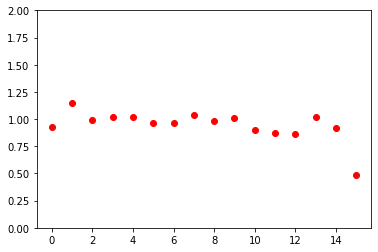

In [17]:
plt.plot(range(16), E_mass, 'ro')
plt.ylim(0,2)
plt.show()